In [50]:
import tensorflow as tf 
tf.test.gpu_device_name()

''

# **EDA and Machine Learning prediction on Spam/Ham Messages**

## **1. Problem Statement**

The dataset contains a set of body features to predict the creature is a ghost, goblin and ghoul.

The main aim of this dataset is to categorize Ghost, Ghoul and Goblin based on their bone length measurements, severity of rot, extent of soullessness, and other characteristics to distinguish (and extinguish) the intruders

## **2. Importing Packages**

In [46]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 4.9MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 3.1MB 15.5MB/s 
     |████████████████████████████████| 71kB 5.2MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 604kB 37.8MB/s 
     |████████████████████████████████| 296kB 39.1MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=4b38a7531d2ce0815a21cd4990efa3fc9b5e0e5fd9ee9bb5daf5d63e1a3287d1
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=e85fb08dad65ecaa65ab41c9405a3a88bcfd79db03458ac4c1a3bca7844ed03f
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Un

In [51]:
import numpy as np
import pandas as pd
import pandas_profiling
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')   
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [52]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)

In [53]:
import nltk #natural language toolkit
from nltk.corpus import stopwords
import string
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer #vectorization
from sklearn.feature_extraction.text import TfidfTransformer # to convert vectorize value into weight
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

##**3. Loading Data** 

In [54]:
import pandas_profiling
import pandas as pd
from pandas_profiling import ProfileReport
csv_df1 = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/Ghouls_train.csv')
csv_df2 = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/Ghouls_test.csv')
csv_df1.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


## **4. Description of the Dataset**

This dataset contains different features which can be used to predict and catagorise between ghost, goblin and ghouls.

*   id - 		id of the creature
*   bone_length - 	average length of bone in the creature, normalized between 0 and 1
*   rotting_flesh - percentage of rotting flesh in the creature
*   hair_length - 	average hair length, normalized between 0 and 1
*   has_soul - 	percentage of soul in the creature
*   color - 	dominant color of the creature: 'white','black','clear','blue','green','blood'
*   type - 		target variable: 'Ghost', 'Goblin', and 'Ghoul'








## **5. Pandas Profiling before Data Preprocessing**

In [ ]:
pandas_profiling.ProfileReport(csv_df1)

### **Observations**

Dataset info:

Number of variables: 7 Number of observations: 371 Missing cells: 0 (0.00%) Variables types:

Numeric = 5 Categorical = 2 Boolean = 0 Text (Unique) = 0 Rejected = 0

*   We can see that bone length has unique values
*   We can see that rotten flesh has unique values
*   We can see that hair length has unique values
*   We can see that soul has unique values
*   Color and type are categorial in nature






## **6. Data Preprocessing**


*   check if any columns have null values.



In [55]:
csv_df1.apply(lambda x: sum(x.isnull()),axis=0)

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64

In [56]:
csv_df2.apply(lambda x: sum(x.isnull()),axis=0)

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
dtype: int64

**Observation**

*   We can see that there are no missing values in the data.




In [9]:
csv_df1.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


**Observation**

*   We can see that all the columns are almost normally distributed.




In [10]:
csv_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


**Observation**

*   We can see that color and type are of object type and other columns are float.




In [57]:
# dropping the 'id' column from both the traindf and the testdf dataframes

df1=csv_df1.drop(['id'], axis = 1)
df2=csv_df2.drop(['id'], axis = 1)

In [58]:
df1.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [13]:
df2.head()

,bone_length,rotting_flesh,hair_length,has_soul,color
0,0.471774,0.387937,0.706087,0.698537,black
1,0.427332,0.645024,0.565558,0.451462,white
2,0.549602,0.491931,0.660387,0.449809,black
3,0.638095,0.682867,0.471409,0.356924,white
4,0.361762,0.583997,0.377256,0.276364,black


In [92]:
#Count the types 

class_count = df1.groupby('type').size()
print(class_count)

type
Ghost     117
Ghoul     129
Goblin    125
dtype: int64


In [93]:
#Print the color types


print (np.sort(df1['color'].unique()))


['black' 'blood' 'blue' 'clear' 'green' 'white']


# **8. Exploratory Data Analysis**

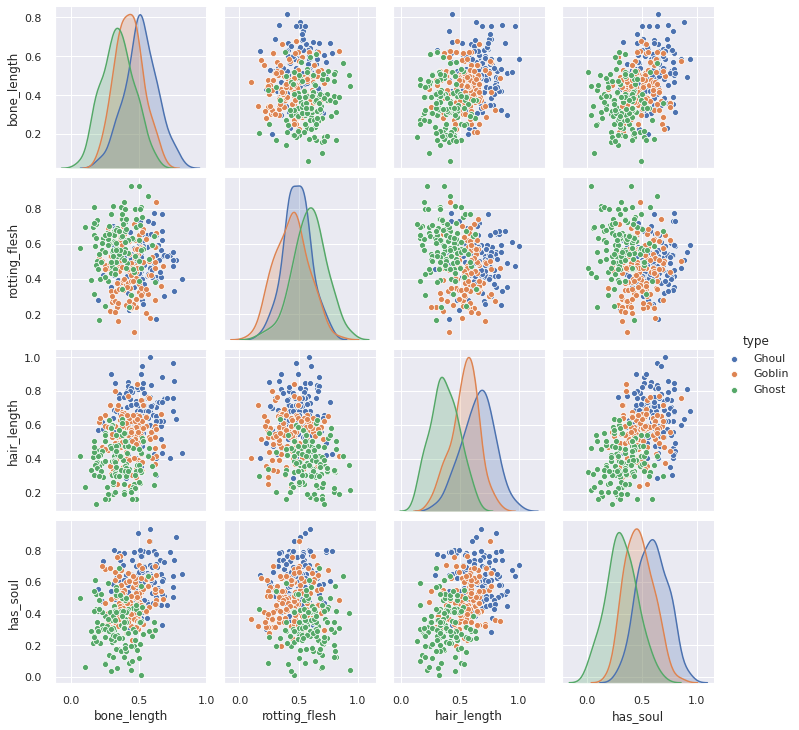

In [17]:
#Pair wise plot

sns.set()

sns.pairplot(df1,hue="type")



*   **Analyse the highest color occurance in the data**




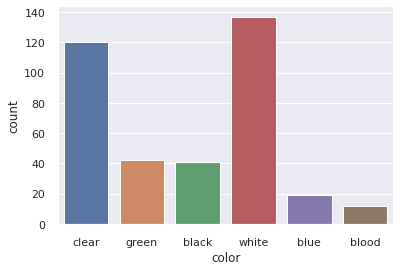

In [18]:
sns.countplot(x='color', data=df1)

We can see that white has the highest occurence amoung other others.



*   **Plot the group by types according wrt to other column features**




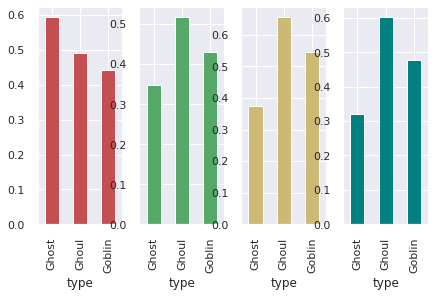

In [21]:

plt.subplot(1,4,1)
df1.groupby('type').mean()['rotting_flesh'].plot(kind='bar',figsize=(7,4), color='r')
plt.subplot(1,4,2)
df1.groupby('type').mean()['bone_length'].plot(kind='bar',figsize=(7,4), color='g')
plt.subplot(1,4,3)
df1.groupby('type').mean()['hair_length'].plot(kind='bar',figsize=(7,4), color='y')
plt.subplot(1,4,4)
df1.groupby('type').mean()['has_soul'].plot(kind='bar',figsize=(7,4), color='teal')

 

*   We can see that Ghost have highest number of rotten flesh.
*   We can see that Ghouls have highest bone length.
*   We can see that Ghouls have longest hair.
*   We can see that Ghouls have highest soul amoung others.





**Plot the group by types according wrt to other colors**

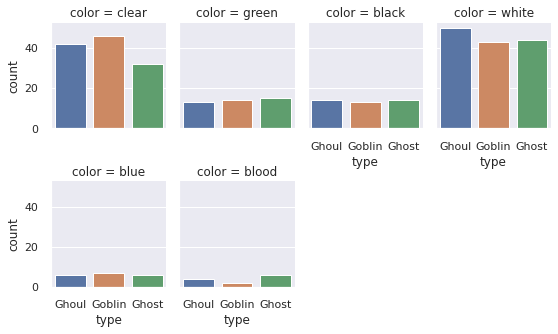

In [22]:
sns.factorplot("type", col="color", col_wrap=4, data=df1, kind="count", size=2.4, aspect=.8)

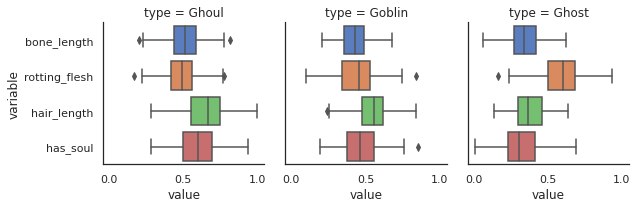

In [59]:
g = sns.FacetGrid(pd.melt(df1, id_vars = 'type', value_vars = ['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']), col = 'type')
g = g.map(sns.boxplot, 'value', 'variable', palette = 'muted')

**Since we are given with train and test data, we can now start fitting our models**

# **9. Model Development & Evaluation**



In [59]:
# check X and Y shape
print('df1 Shape:', df1.shape)
print('df2 Shape:', df2.shape)

df1 Shape: (371, 6)
df2 Shape: (529, 5)


In [60]:
#Separating the dependent variable from the independent variables
y_train = df1.iloc[:,-1]
print(y_train)

0      Ghoul 
1      Goblin
2      Ghoul 
3      Ghoul 
4      Ghost 
       ...   
366    Goblin
367    Ghost 
368    Ghoul 
369    Ghost 
370    Ghoul 
Name: type, Length: 371, dtype: object


In [61]:
x_train = df1.iloc[:,1:-1]
print(x_train)

     rotting_flesh  hair_length  has_soul  color
0    0.350839       0.465761     0.781142  clear
1    0.425868       0.531401     0.439899  green
2    0.354330       0.811616     0.791225  black
3    0.508723       0.636766     0.884464  black
4    0.875862       0.418594     0.636438  green
..        ...            ...          ...    ...
366  0.391760       0.660590     0.635689  blue 
367  0.564836       0.539216     0.551471  green
368  0.501147       0.496446     0.544003  clear
369  0.771286       0.583503     0.300618  clear
370  0.768469       0.737274     0.608384  white

[371 rows x 4 columns]


## **XGBoosting Classifier Algorithm**

In [62]:
#For encoding the categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
labelencoder_COL= LabelEncoder()
y_train= labelencoder_Y.fit_transform(y_train)  
#print(y_train)
x_train['color']=labelencoder_COL.fit_transform(x_train['color'])
#print(x_train)

In [63]:
#Checking correlation between the independent variables
print(df1.corr())

               bone_length  rotting_flesh  hair_length  has_soul
bone_length    1.000000    -0.041716       0.353881     0.381675
rotting_flesh -0.041716     1.000000      -0.220353    -0.132051
hair_length    0.353881    -0.220353       1.000000     0.474835
has_soul       0.381675    -0.132051       0.474835     1.000000




*   We can see that not much correlation amoung the variables. 



In [64]:

#For getting the accuracy of the trained models 
from sklearn import metrics

In [65]:
# xgbclassifier
from xgboost.sklearn import XGBClassifier
clfX=XGBClassifier()
clfX.fit(x_train, y_train) 
y_predX = clfX.predict(x_train)
print(metrics.accuracy_score(y_train,y_predX))

0.921832884097035


**By performing the XGB classifier algorithm we are getting accuracy 0.921832884097035 which is really good.**

Now let's check with other algorithms. 

## **Naive Bayes**

In [66]:
#Naive-Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_train)
print(metrics.accuracy_score(y_train,y_pred))

0.7196765498652291




**By performing the Naive-Bayes algorithm we are getting accuracy 0.7196765498652291**




## **Logistic Regression**

In [71]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [72]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
accuracy_scorer = metrics.make_scorer(metrics.accuracy_score)
from sklearn.metrics import classification_report, accuracy_score


In [73]:
X_train = pd.get_dummies(df1.drop('type', axis = 1))
y_train = df1['type']
X_test = pd.get_dummies(df2)

In [83]:
params = {'penalty':['l1', 'l2'], 'C':[1, 2, 3, 5, 10]}
lr = LogisticRegression(random_state = 0)
clf = GridSearchCV(lr, param_grid = params, scoring = accuracy_scorer, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

lr_best = LogisticRegression(penalty = 'l1', C = 1, random_state = 0)


Best score: 0.7143063063063062
Best parameters: {'C': 5, 'penalty': 'l2'}


**By performing the Logistic Regression algorithm we are getting accuracy 0.7143063063063062**

## **Ada Boost and Feature Selection**

Accuracy of the Adaboost on test set: 0.741
              precision    recall  f1-score   support

       Ghost       0.87      0.85      0.86       117
       Ghoul       0.74      0.74      0.74       129
      Goblin       0.62      0.63      0.63       125

    accuracy                           0.74       371
   macro avg       0.75      0.74      0.74       371
weighted avg       0.74      0.74      0.74       371



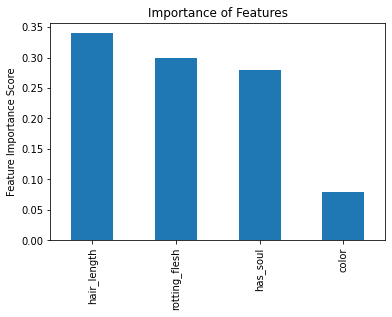

In [79]:
import sklearn.ensemble as en
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

baseline = en.AdaBoostClassifier()
baseline.fit(x_train,y_train)
predictors=list(x_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the Adaboost on test set: {:.3f}'.format(baseline.score(x_train, y_train)))
pred=baseline.predict(x_train)
print(classification_report(y_train, pred))

# **8. Summary**

We performed EDA to undertand the relationship between both differnt columns.

We have how different features affected the target variable.

We constructed different machine learning models like XGBoost, Naive Bayes, linear regression model, Ada boost model and got best result with XGBoost model.

We performed feature selection to know that hair length is the most important feature amoung others.